In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
from keras._tf_keras.keras.preprocessing.image import ImageDataGenerator
from tensorflow.python.keras.models import Sequential
from tensorflow.python.keras.layers import Dropout, Flatten, Dense
from keras import applications
from sklearn.metrics import pairwise_distances
import requests
from PIL import Image
import pickle
from datetime import datetime
from PIL import ImageFile
ImageFile.LOAD_TRUNCATED_IMAGES = True
import plotly.figure_factory as ff
import plotly.graph_objects as go
import plotly.express as px
#import streamlit as st
#use the below library while displaying the images in jupyter notebook
from IPython.display import display, Image

fashion_df = pd.read_csv(r"Women_dataset.csv")
fashion_df

,id,gender,masterCategory,subCategory,articleType,baseColour,season,year,usage,productDisplayName
0,59263,Women,Accessories,Watches,Watches,Silver,Winter,2016.0,Casual,Titan Women Silver Watch
1,26960,Women,Apparel,Topwear,Shirts,Purple,Summer,2012.0,Casual,Jealous 21 Women Purple Shirt
2,48123,Women,Accessories,Belts,Belts,Black,Summer,2012.0,Casual,Fossil Women Black Huarache Weave Belt
3,47957,Women,Accessories,Bags,Handbags,Blue,Summer,2012.0,Casual,Murcia Women Blue Handbag
4,51832,Women,Apparel,Innerwear,Bra,Beige,Summer,2016.0,Casual,Bwitch Beige Full-Coverage Bra BW335
...,...,...,...,...,...,...,...,...,...,...
18627,55283,Women,Personal Care,Makeup,Highlighter and Blush,Pink,Spring,2017.0,Casual,Lakme Absolute Cheek Chromatic Day Blushes Blu...
18628,12544,Women,Apparel,Topwear,Tshirts,Peach,Fall,2011.0,Casual,Tantra Women Printed Peach T-shirt
18629,42234,Women,Apparel,Topwear,Tops,Blue,Summer,2012.0,Casual,Sepia Women Blue Printed Top
18630,46694,Women,Personal Care,Fragrance,Perfume and Body Mist,Blue,Spring,2017.0,Casual,Rasasi Women Blue Lady Perfume


In [3]:
print("Total number of products : ", fashion_df.shape[0])
print("Total number of unique subcategories : ", fashion_df["subCategory"].nunique())
print("Total number of unique gender types : ", fashion_df["gender"].nunique())

Total number of products :  18632
Total number of unique subcategories :  37
Total number of unique gender types :  1


C:\Users\insha\AppData\Local\Temp\ipykernel_14268\3030242480.py:5: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  plot.set_xticklabels(plot.get_xticklabels())


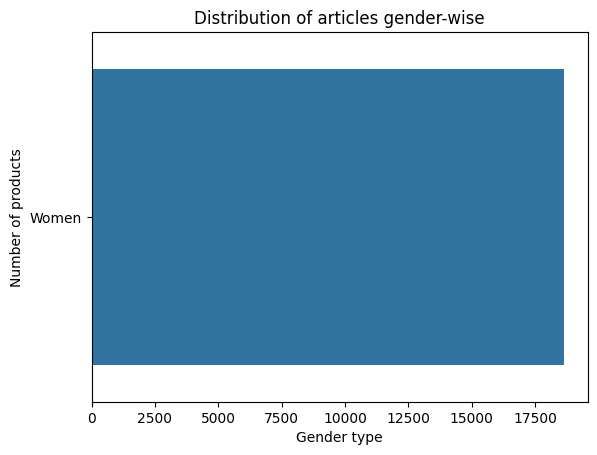

In [5]:
plot = sns.countplot(fashion_df["gender"])
plt.title("Distribution of articles gender-wise")
plt.xlabel("Gender type")
plt.ylabel("Number of products")
plot.set_xticklabels(plot.get_xticklabels())
plt.show()

In [4]:
img_width, img_height = 224, 224

#top_model_weights_path = 'resnet50_weights_tf_dim_ordering_tf_kernels_notop.h5'
train_data_dir = "/kaggle/input/fashion-images/data/Footwear/Men/Images/"

nb_train_samples = 811
epochs = 50
batch_size = 1

def extract_features():
    Itemcodes = []
    datagen = ImageDataGenerator(rescale=1. / 255)
    model = applications.ResNet50(include_top=False, weights='imagenet')
    generator = datagen.flow_from_directory(
        train_data_dir,
        target_size=(img_width, img_height),
        batch_size=batch_size,
        class_mode=None,
        shuffle=False)
    for i in generator.filenames:
        Itemcodes.append(i[(i.find("/")+1):i.find(".")])
    extracted_features = model.predict_generator(generator, nb_train_samples // batch_size)
    extracted_features = extracted_features.reshape((811, 100352))
    
    np.save(open('./Men_ResNet_features.npy', 'wb'), extracted_features)
    np.save(open('./Men_ResNet_feature_product_ids.npy', 'wb'), np.array(Itemcodes))
    
a = datetime.now()
extract_features()
print("Time taken in feature extraction", datetime.now()-a)

94765736/94765736 ━━━━━━━━━━━━━━━━━━━━ 13s 0us/step


FileNotFoundError: [WinError 3] The system cannot find the path specified: '/kaggle/input/fashion-images/data/Footwear/Men/Images/'

In [ ]:
extracted_features = np.load('/kaggle/working/Men_ResNet_features.npy')
Productids = np.load('/kaggle/working/Men_ResNet_feature_product_ids.npy')
men = footwear_men.copy()
#men = pd.read_csv('./footwear_men.csv')
df_Productids = list(men['ProductId'])
Productids = list(Productids)